## THE BRIDGE (Data Science Bootcamp - Agosto 2020)
##  PROYECTO GRUPO D 
________________
### Análisis de datos asociados al COVID-19 del grupo de paises conformado por Portugal, Venezuela, Turquía, Reino Unido y España.

Fuente de datos (Data Set)  "https://covid.ourworldindata.org/data/owid-covid-data.csv"

Team members: 
- José Luis Manjon  presimanjon@yahoo.es        git @JoseLuisManjon
- Filipa Teles      filipa.teles@icloud.com     git @Filipate
- Mónica Villasuso  villasuso.monica@gmail.com  git @MVillasuso
_________________

Import de las librerías requeridas para el análisis

In [1]:
import pandas as pd 
import json 
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Carga de datos en un dataframe de la fuente a utilizar

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_general = pd.read_csv(url, sep=",")
covid_general

iso_code      continent       location        date  total_cases  \
0          ABW  North America          Aruba  2020-03-13          2.0   
1          ABW  North America          Aruba  2020-03-20          4.0   
2          ABW  North America          Aruba  2020-03-24         12.0   
3          ABW  North America          Aruba  2020-03-25         17.0   
4          ABW  North America          Aruba  2020-03-26         19.0   
...        ...            ...            ...         ...          ...   
35292      NaN            NaN  International  2020-02-28        705.0   
35293      NaN            NaN  International  2020-02-29        705.0   
35294      NaN            NaN  International  2020-03-01        705.0   
35295      NaN            NaN  International  2020-03-02        705.0   
35296      NaN            NaN  International  2020-03-10        696.0   

       new_cases  total_deaths  new_deaths  total_cases_per_million  \
0            2.0           0.0         0.0                   18.733   
1            2.0           0.0         0.0                   37.465   
2            8.0           0.0         0.0                  112.395   
3            5.0           0.0         0.0                  159.227   
4            2.0           0.0         0.0                  177.959   
...          ...           ...         ...                      ...   
35292        0.0           4.0         0.0                      NaN   
35293        0.0           6.0         2.0                      NaN   
35294        0.0           6.0         0.0                      NaN   
35295        0.0           6.0         0.0                      NaN   
35296       -9.0           7.0         1.0                      NaN   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
0                     18.733  ...          7.452       35973.781   
1                     18.733  ...          7.452       35973.781   
2                     74.930  ...          7.452       35973.781   
3                     46.831  ...          7.452       35973.781   
4                     18.733  ...          7.452       35973.781   
...                      ...  ...            ...             ...   
35292                    NaN  ...            NaN             NaN   
35293                    NaN  ...            NaN             NaN   
35294                    NaN  ...            NaN             NaN   
35295                    NaN  ...            NaN             NaN   
35296                    NaN  ...            NaN             NaN   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  NaN                    NaN                11.62   
1                  NaN                    NaN                11.62   
2                  NaN                    NaN                11.62   
3                  NaN                    NaN                11.62   
4                  NaN                    NaN                11.62   
...                ...                    ...                  ...   
35292              NaN                    NaN                  NaN   
35293              NaN                    NaN                  NaN   
35294              NaN                    NaN                  NaN   
35295              NaN                    NaN                  NaN   
35296              NaN                    NaN                  NaN   

       female_smokers  male_smokers  handwashing_facilities  \
0                 NaN           NaN                     NaN   
1                 NaN           NaN                     NaN   
2                 NaN           NaN                     NaN   
3                 NaN           NaN                     NaN   
4                 NaN           NaN                     NaN   
...               ...           ...                     ...   
35292             NaN           NaN                     NaN   
35293             NaN           NaN                     NaN   
35294             NaN           NaN                

Exploración de los datos del dataframe

In [3]:
covid_general.shape

(35297, 36)

In [4]:
covid_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35297 entries, 0 to 35296
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         35233 non-null  object 
 1   continent                        35012 non-null  object 
 2   location                         35297 non-null  object 
 3   date                             35297 non-null  object 
 4   total_cases                      34952 non-null  float64
 5   new_cases                        34952 non-null  float64
 6   total_deaths                     34952 non-null  float64
 7   new_deaths                       34952 non-null  float64
 8   total_cases_per_million          34888 non-null  float64
 9   new_cases_per_million            34888 non-null  float64
 10  total_deaths_per_million         34888 non-null  float64
 11  new_deaths_per_million           34888 non-null  float64
 12  new_tests         

In [5]:
covid_general.index

RangeIndex(start=0, stop=35297, step=1)

In [6]:
# Revisión de los datos globales para ver si hay información totalizada (continent or country tienen valor  Null) y eliminarla posteriormente para el análisis
covid_general[(covid_general.continent.isnull()) | (covid_general.iso_code.isnull())]

iso_code continent       location        date  total_cases  new_cases  \
35012  OWID_WRL       NaN          World  2019-12-31         27.0       27.0   
35013  OWID_WRL       NaN          World  2020-01-01         27.0        0.0   
35014  OWID_WRL       NaN          World  2020-01-02         27.0        0.0   
35015  OWID_WRL       NaN          World  2020-01-03         44.0       17.0   
35016  OWID_WRL       NaN          World  2020-01-04         44.0        0.0   
...         ...       ...            ...         ...          ...        ...   
35292       NaN       NaN  International  2020-02-28        705.0        0.0   
35293       NaN       NaN  International  2020-02-29        705.0        0.0   
35294       NaN       NaN  International  2020-03-01        705.0        0.0   
35295       NaN       NaN  International  2020-03-02        705.0        0.0   
35296       NaN       NaN  International  2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
35012           0.0         0.0                    0.003   
35013           0.0         0.0                    0.003   
35014           0.0         0.0                    0.003   
35015           0.0         0.0                    0.006   
35016           0.0         0.0                    0.006   
...             ...         ...                      ...   
35292           4.0         0.0                      NaN   
35293           6.0         2.0                      NaN   
35294           6.0         0.0                      NaN   
35295           6.0         0.0                      NaN   
35296           7.0         1.0                      NaN   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
35012                  0.003  ...          5.355       15469.207   
35013                  0.000  ...          5.355       15469.207   
35014                  0.000  ...          5.355       15469.207   
35015                  0.002  ...          5.355       15469.207   
35016                  0.000  ...          5.355       15469.207   
...                      ...  ...            ...             ...   
35292                    NaN  ...            NaN             NaN   
35293                    NaN  ...            NaN             NaN   
35294                    NaN  ...            NaN             NaN   
35295                    NaN  ...            NaN             NaN   
35296                    NaN  ...            NaN             NaN   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
35012             10.0                 233.07                 8.51   
35013             10.0                 233.07                 8.51   
35014             10.0                 233.07                 8.51   
35015             10.0                 233.07                 8.51   
35016             10.0                 233.07                 8.51   
...                ...                    ...                  ...   
35292              NaN                    NaN                  NaN   
35293              NaN                    NaN                  NaN   
35294              NaN                    NaN                  NaN   
35295              NaN                    NaN                  NaN   
35296              NaN                    NaN                  NaN   

       female_smokers  male_smokers  handwashing_facilities  \
35012           6.434        34.635                   60.13   
35013           6.434        34.635                   60.13   
35014           6.434        34.635                   60.13   
35015           6.434        34.635                   60.13   
35016           6.434        34.635                   60.13   
...               ...           ...                     ...   
35292             NaN           NaN                     NaN   
35293             NaN           NaN                     NaN   
35294             NaN           NaN                     NaN   
35295             NaN           NaN  

In [7]:
# DF Mundial sin los datos globales (continent is Nan) o de países Nan
world_df =  covid_general[~((covid_general.continent.isnull()) | (covid_general.iso_code.isnull()))]

In [8]:
world_df.shape

(35012, 36)

In [9]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35012 entries, 0 to 35011
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         35012 non-null  object 
 1   continent                        35012 non-null  object 
 2   location                         35012 non-null  object 
 3   date                             35012 non-null  object 
 4   total_cases                      34667 non-null  float64
 5   new_cases                        34667 non-null  float64
 6   total_deaths                     34667 non-null  float64
 7   new_deaths                       34667 non-null  float64
 8   total_cases_per_million          34667 non-null  float64
 9   new_cases_per_million            34667 non-null  float64
 10  total_deaths_per_million         34667 non-null  float64
 11  new_deaths_per_million           34667 non-null  float64
 12  new_tests         

In [10]:
world_df["date"]=pd.to_datetime(world_df["date"],format="%Y-%m-%d")

______________
## RANKING CON RESPECTO AL TOTAL
What position do your countries occupe respect to the number of total infected, total deaths and total recoveries?
______________

In [11]:
#Ranking diario por países considerando el numero de casos totales (i.e. Total Infected)
world_df["rank_TC"] = world_df.groupby(["date"])["total_cases"].rank(method = "dense", ascending = False)

In [12]:
#Ranking diario por países considerando el numero de muertes (i.e. Total Deaths)
world_df["rank_TD"] = world_df.groupby(["date"])["total_deaths"].rank(method = "dense", ascending = False)

In [13]:
#Ranking diario por países considerando el numero de casos totales por millon de habitantes (i.e. total_cases_per_million)
world_df["rank_TCxM"] = world_df.groupby(["date"])["total_cases_per_million"].rank(method = "dense", ascending = False)

In [14]:
#EJEMPLO DEL RANKING DE CASOS TOTALES PARA EL DIA 28 DE MARZO
#world_df.iloc[world_df[world_df.date=="2020-03-28"]["rank_TC"].sort_values(ascending=True).index]

In [15]:
#EJEMPLO DEL RANKING DE CASOS TOTALES PARA  ESPAñA
#world_df[world_df.iso_code=="ESP"]

In [16]:
cols_rank= ["rank_TC", "rank_TD", "rank_TCxM"]

## ANÁLISIS CONJUNTO PAISES DEL GRUPO D
### PORTUGAL, VENEZUELA, TURQUÍA, GRAN BRETAÑA y ESPAÑA

Filtro (en un dataframe) de los datos correspondientes a los países del grupo D

In [17]:
paises_grupoD=["PRT", "VEN", "TUR", "GBR", "ESP"]
paises_nombres={"PRT":"Portugal", "VEN":"Venezuela", "TUR":"Turquía", "GBR":"Gran Bretaña", "ESP":"España"}
covid_grupoD=world_df[world_df.iso_code.isin(paises_grupoD)]
covid_grupoD


iso_code      continent   location       date  total_cases  new_cases  \
10076      ESP         Europe      Spain 2019-12-31          0.0        0.0   
10077      ESP         Europe      Spain 2020-01-01          0.0        0.0   
10078      ESP         Europe      Spain 2020-01-02          0.0        0.0   
10079      ESP         Europe      Spain 2020-01-03          0.0        0.0   
10080      ESP         Europe      Spain 2020-01-04          0.0        0.0   
...        ...            ...        ...        ...          ...        ...   
33784      VEN  South America  Venezuela 2020-08-03      20206.0      763.0   
33785      VEN  South America  Venezuela 2020-08-04      20206.0        0.0   
33786      VEN  South America  Venezuela 2020-08-05      21438.0     1232.0   
33787      VEN  South America  Venezuela 2020-08-06      22299.0      861.0   
33788      VEN  South America  Venezuela 2020-08-07      22299.0        0.0   

       total_deaths  new_deaths  total_cases_per_million  \
10076           0.0         0.0                    0.000   
10077           0.0         0.0                    0.000   
10078           0.0         0.0                    0.000   
10079           0.0         0.0                    0.000   
10080           0.0         0.0                    0.000   
...             ...         ...                      ...   
33784         174.0         5.0                  710.580   
33785         174.0         0.0                  710.580   
33786         187.0        13.0                  753.905   
33787         195.0         8.0                  784.184   
33788         195.0         0.0                  784.184   

       new_cases_per_million  ...  cardiovasc_death_rate  diabetes_prevalence  \
10076                  0.000  ...                 99.403                 7.17   
10077                  0.000  ...                 99.403                 7.17   
10078                  0.000  ...                 99.403                 7.17   
10079                  0.000  ...                 99.403                 7.17   
10080                  0.000  ...                 99.403                 7.17   
...                      ...  ...                    ...                  ...   
33784                 26.832  ...                204.850                 6.47   
33785                  0.000  ...                204.850                 6.47   
33786                 43.325  ...                204.850                 6.47   
33787                 30.279  ...                204.850                 6.47   
33788                  0.000  ...                204.850                 6.47   

       female_smokers  male_smokers  handwashing_facilities  \
10076            27.4          31.4                     NaN   
10077            27.4          31.4                     NaN   
10078            27.4          31.4                     NaN   
10079            27.4          31.4                     NaN   
10080            27.4          31.4                     NaN   
...               ...           ...                     ...   
33784             NaN           NaN                     NaN   
33785             NaN           NaN                     NaN   
33786             NaN           NaN                     NaN   
33787             NaN           NaN                     NaN   
33788             NaN           NaN                     NaN   

       hospital_beds_per_thousand  life_expectancy  rank_TC  rank_TD  \
10076                        2.97            83.56      2.0      1.0   
10077                        2.97            83.56      2.0      1.0   
10078                        2.97            83.56      2.0      1.0   
10079                        2.97            83.56      2.0      1.0   
10080                        2.97            83.56      2.0      1.0   
...                           ...              ...      ...      ...   
33784                        0.80            72.06     66.0     80.0   
33785                        0

In [18]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 10076 to 33788
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         893 non-null    object        
 1   continent                        893 non-null    object        
 2   location                         893 non-null    object        
 3   date                             893 non-null    datetime64[ns]
 4   total_cases                      891 non-null    float64       
 5   new_cases                        891 non-null    float64       
 6   total_deaths                     891 non-null    float64       
 7   new_deaths                       891 non-null    float64       
 8   total_cases_per_million          891 non-null    float64       
 9   new_cases_per_million            891 non-null    float64       
 10  total_deaths_per_million         891 non-null    float64

In [19]:
covid_grupoD["date"].min()

Timestamp('2019-12-31 00:00:00')

In [20]:
#Selección de los registros a partir de la fecha en que comenzaron a reportar  datos de COVID
covid_grupoD[covid_grupoD["date"] == covid_grupoD["date"].min()]

iso_code continent        location       date  total_cases  new_cases  \
10076      ESP    Europe           Spain 2019-12-31          0.0        0.0   
11725      GBR    Europe  United Kingdom 2019-12-31          0.0        0.0   

       total_deaths  new_deaths  total_cases_per_million  \
10076           0.0         0.0                      0.0   
11725           0.0         0.0                      0.0   

       new_cases_per_million  ...  cardiovasc_death_rate  diabetes_prevalence  \
10076                    0.0  ...                 99.403                 7.17   
11725                    0.0  ...                122.137                 4.28   

       female_smokers  male_smokers  handwashing_facilities  \
10076            27.4          31.4                     NaN   
11725            20.0          24.7                     NaN   

       hospital_beds_per_thousand  life_expectancy  rank_TC  rank_TD  \
10076                        2.97            83.56      2.0      1.0   
11725                        2.54            81.32      2.0      1.0   

       rank_TCxM  
10076        2.0  
11725        2.0  

[2 rows x 39 columns]

In [21]:
covid_grupoD.new_cases.value_counts(dropna = False).sum()

893

In [22]:
# Crear un DF con las filas de datos que No contienen informacion del COVID
nocovid_grupoD = covid_grupoD[(covid_grupoD["new_cases"]==0) & (covid_grupoD["total_cases"] ==0)]

In [23]:
nocovid_grupoD.shape

(64, 39)

In [24]:
# Eliminar del DF las filas que NO contienen info del COVID
covid_grupoD=covid_grupoD.drop(covid_grupoD[(covid_grupoD["new_cases"]==0) & (covid_grupoD["total_cases"] ==0)].index)

In [25]:
covid_grupoD.shape

(829, 39)

In [26]:
# Verificar si hay alguna columna donde TODOS sus datos sean nulos
covid_grupoD.isnull().sum()

iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                          2
new_cases                            2
total_deaths                         2
new_deaths                           2
total_cases_per_million              2
new_cases_per_million                2
total_deaths_per_million             2
new_deaths_per_million               2
new_tests                          425
total_tests                        397
total_tests_per_thousand           397
new_tests_per_thousand             425
new_tests_smoothed                 320
new_tests_smoothed_per_thousand    320
tests_per_case                     322
positive_rate                      322
tests_units                        292
stringency_index                    31
population                           0
population_density                   0
median_age                           0
aged_65_older            

In [27]:
# Eliminar la columna handwashing_facilities pues no contiend informacion
covid_grupoD.drop(columns=["handwashing_facilities"], axis = 1, inplace=True)

In [28]:

covid_grupoD.groupby("iso_code")["date"].min()

iso_code
ESP   2020-02-01
GBR   2020-02-01
PRT   2020-03-01
TUR   2020-03-12
VEN   2020-03-15
Name: date, dtype: datetime64[ns]

In [29]:
covid_grupoD.reset_index(inplace=True)

In [30]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            829 non-null    int64         
 1   iso_code                         829 non-null    object        
 2   continent                        829 non-null    object        
 3   location                         829 non-null    object        
 4   date                             829 non-null    datetime64[ns]
 5   total_cases                      827 non-null    float64       
 6   new_cases                        827 non-null    float64       
 7   total_deaths                     827 non-null    float64       
 8   new_deaths                       827 non-null    float64       
 9   total_cases_per_million          827 non-null    float64       
 10  new_cases_per_million            827 non-null    float64      

In [31]:
# Creacion de un DF con las fechas del estado de alarma para cada país
alarm_dicc = {'iso_code': ["ESP", "PRT", "VEN", "GBR", "TUR"],
        'alarm_init': ['2020-03-14', '2020-03-13', '2020-03-13', '2020-03-23',np.NaN],
        'alarm_end': ['2020-06-21', '2020-06-01', '2020-07-11', '2020-07-04', np.NaN]
       }
alarm_dates = pd.DataFrame(alarm_dicc, columns = ['iso_code', 'alarm_init', 'alarm_end'])

alarm_dates

iso_code  alarm_init   alarm_end
0      ESP  2020-03-14  2020-06-21
1      PRT  2020-03-13  2020-06-01
2      VEN  2020-03-13  2020-07-11
3      GBR  2020-03-23  2020-07-04
4      TUR         NaN         NaN

# Show different tendencies for each column in your dataset

In [32]:
#Lista de las columnas de datos para graficarlas y contrastar la tendencia entre los países del grupo D
cols = list(covid_grupoD.columns.values[[5,6,7,8,9,10,11,12,13,14,15,16,17]])
cols

['total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed']

In [33]:
# Función para mostrar el valor de una columna de datos en un gráfico de líneas (1 por país)
def graf_grupo (x_val, y_val, hue_val, df, inv_y): 
    fig= plt.figure(figsize =(30,10))
    g = sns.relplot(x =x_val, y = y_val, hue = hue_val, kind = "line", data = df, palette = "Paired")
    g._legend.texts[0].set_text("")
    g._legend.set_title("Country")
    plt.xticks(rotation = "vertical")
    tit = y_val.upper() + " by Date and Country - Group D"
    plt.title(tit)
    plt.savefig("../resources/" + y_val+ "_x_C_D" +  ".png",bbox_inches='tight')
    if inv_y:
        plt.gca().invert_yaxis()
    plt.show()

<Figure size 2160x720 with 0 Axes>

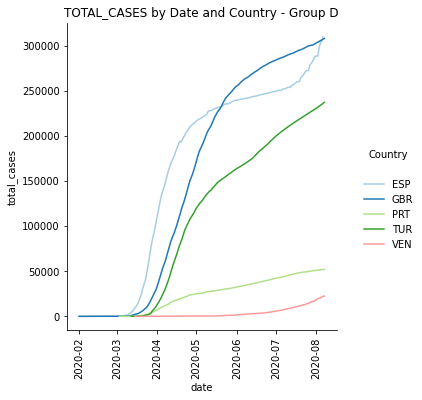

<Figure size 2160x720 with 0 Axes>

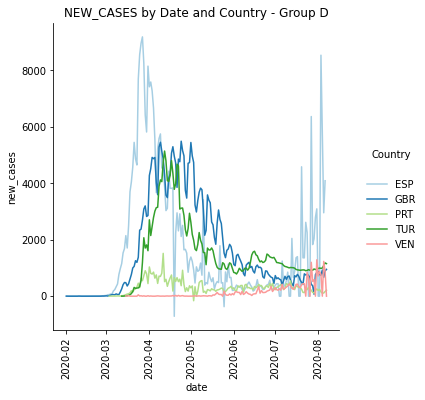

<Figure size 2160x720 with 0 Axes>

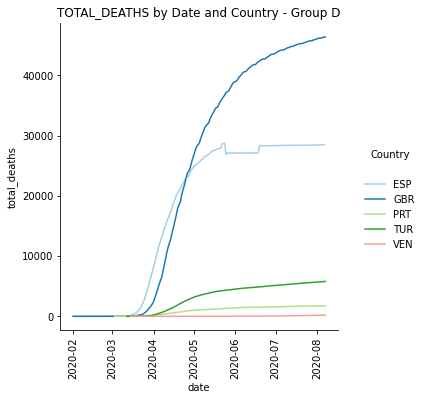

<Figure size 2160x720 with 0 Axes>

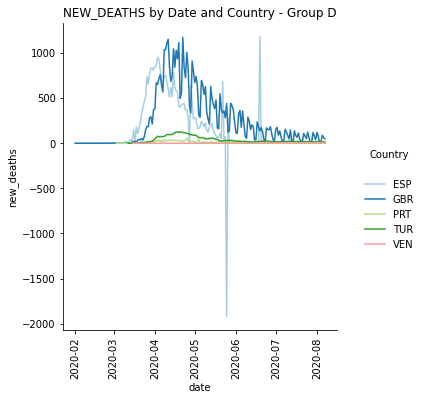

<Figure size 2160x720 with 0 Axes>

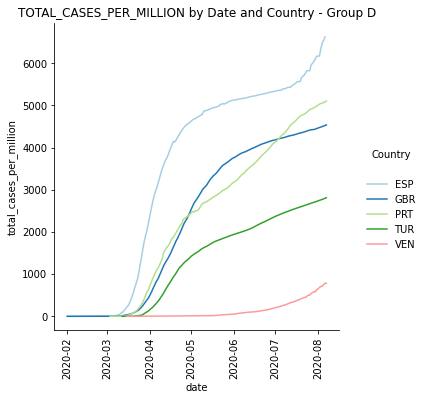

<Figure size 2160x720 with 0 Axes>

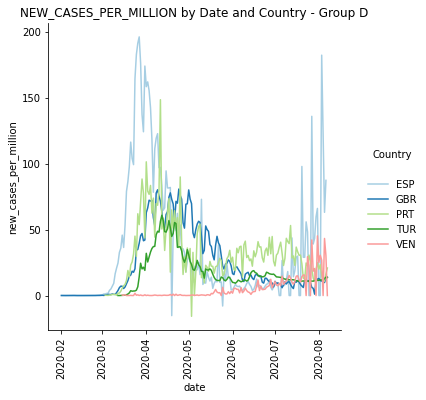

<Figure size 2160x720 with 0 Axes>

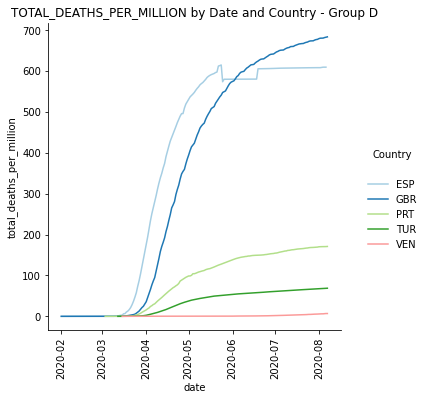

<Figure size 2160x720 with 0 Axes>

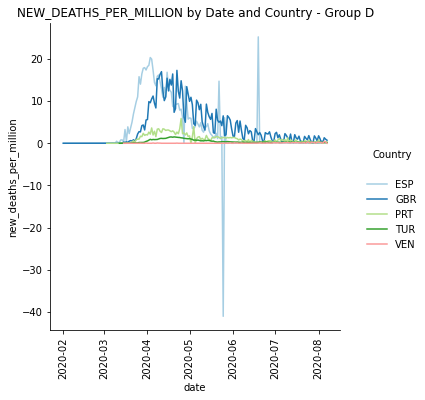

<Figure size 2160x720 with 0 Axes>

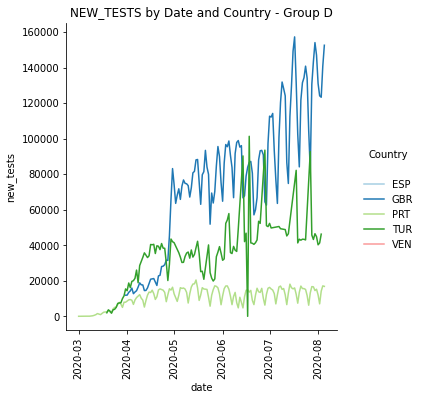

<Figure size 2160x720 with 0 Axes>

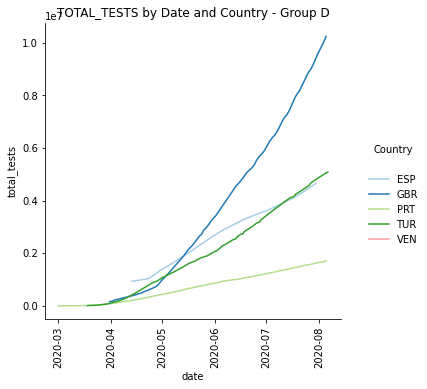

<Figure size 2160x720 with 0 Axes>

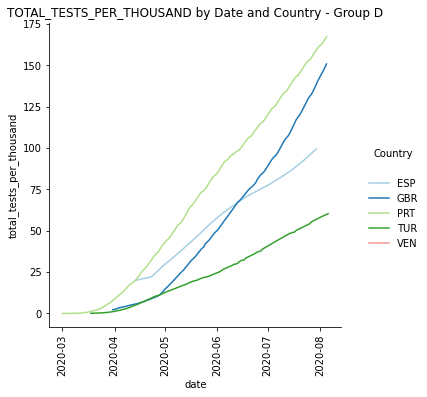

<Figure size 2160x720 with 0 Axes>

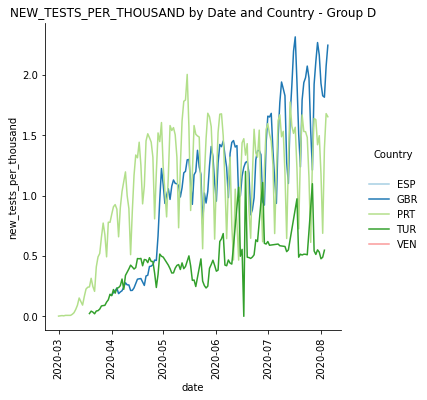

<Figure size 2160x720 with 0 Axes>

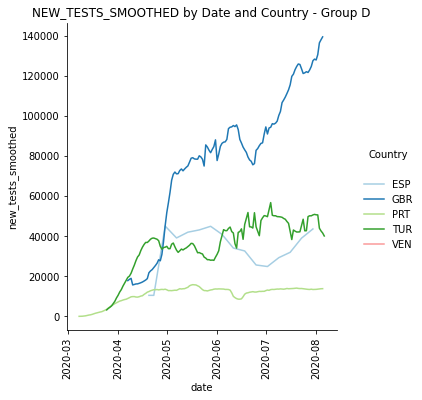

In [34]:
for elem in cols:
    graf_grupo("date" , elem , "iso_code", covid_grupoD, False )

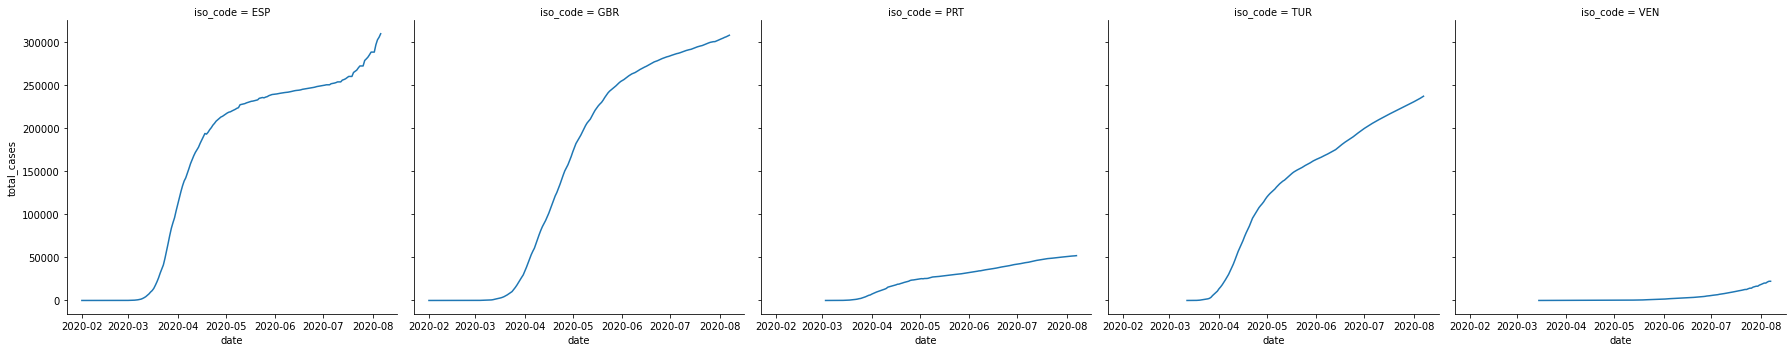

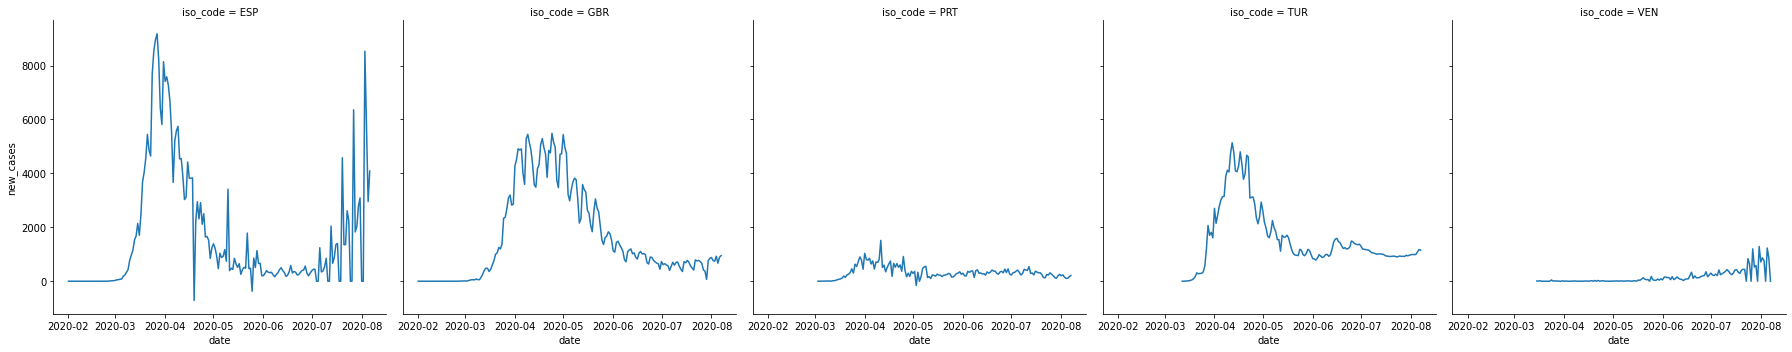

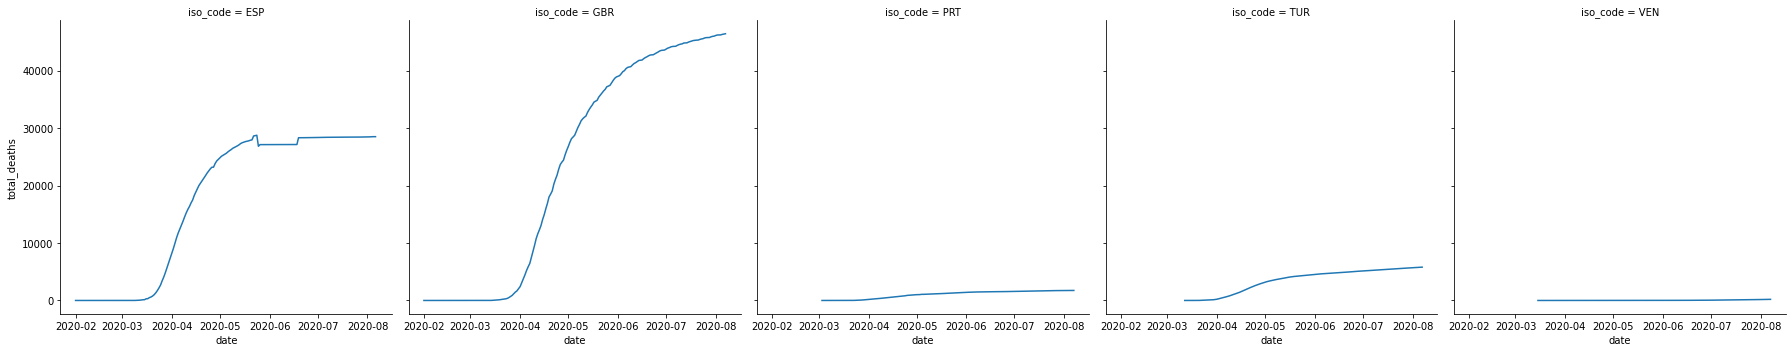

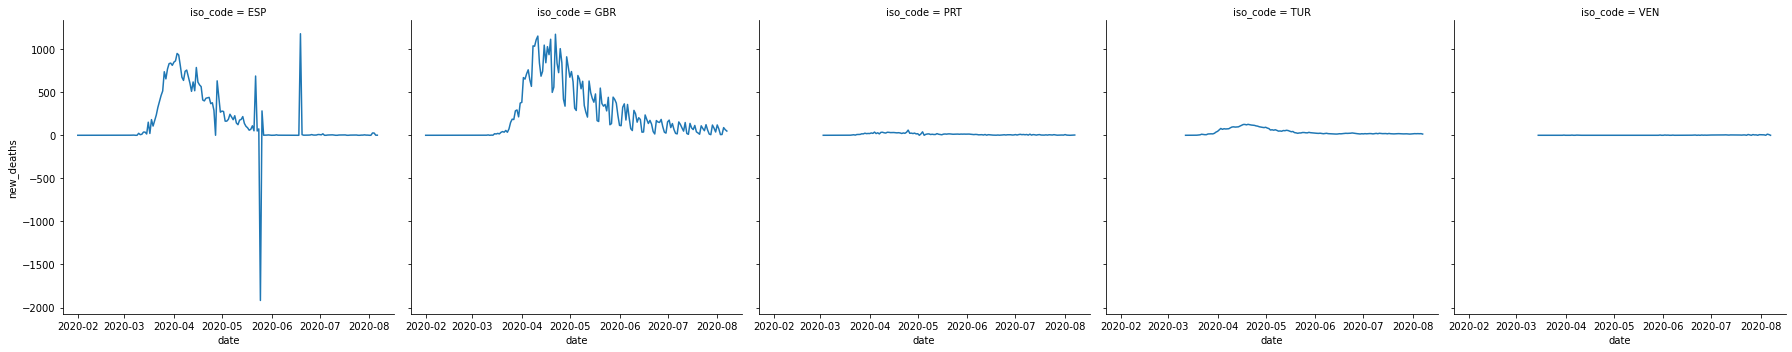

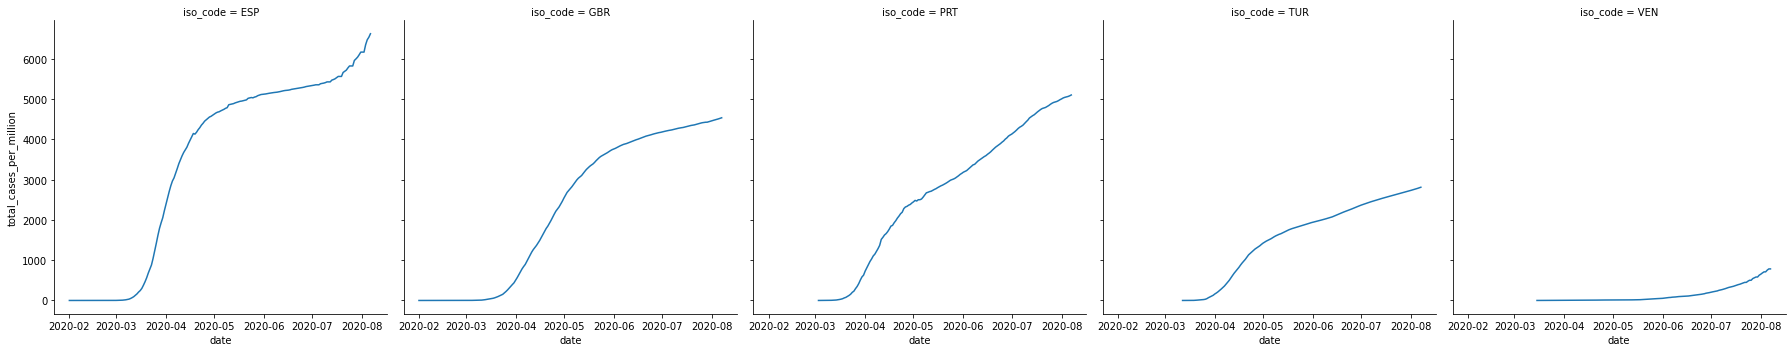

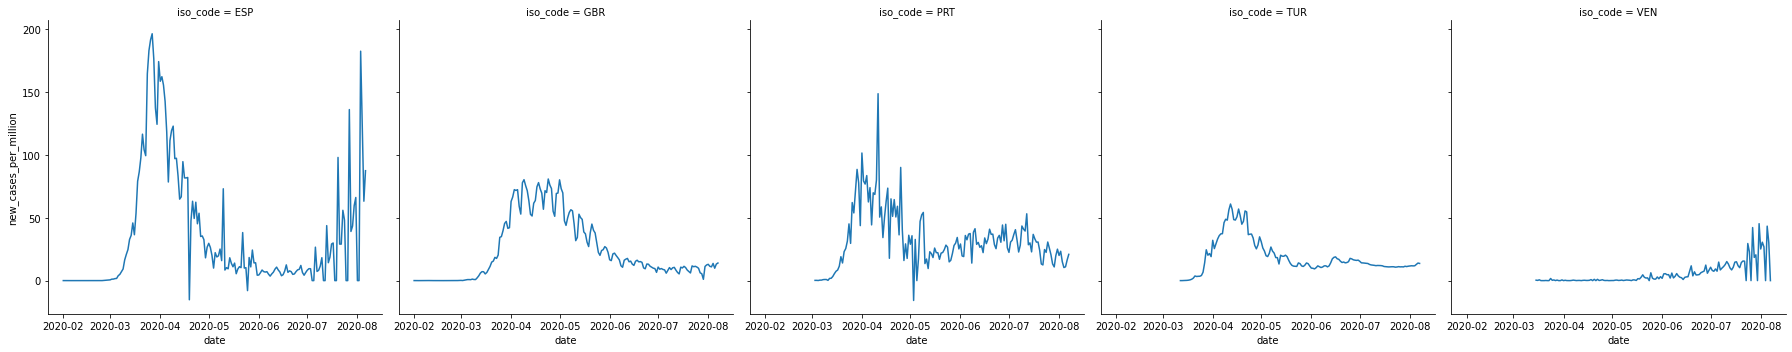

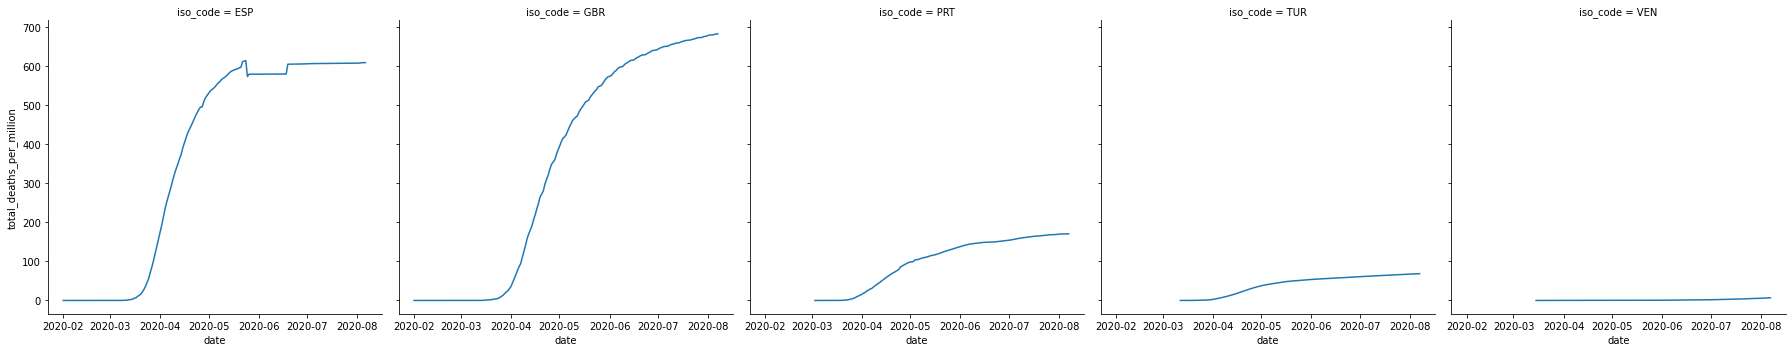

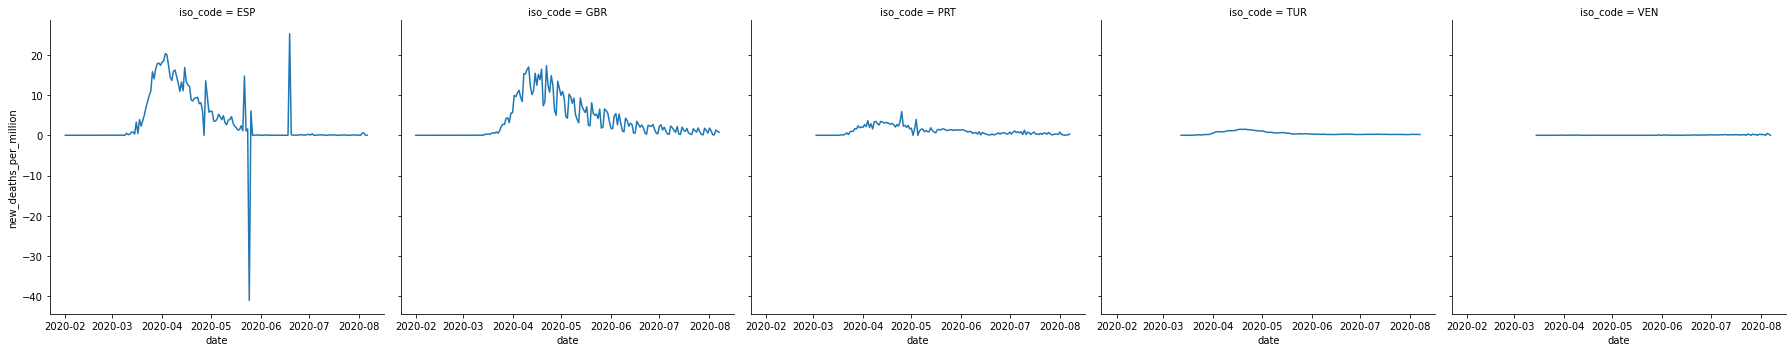

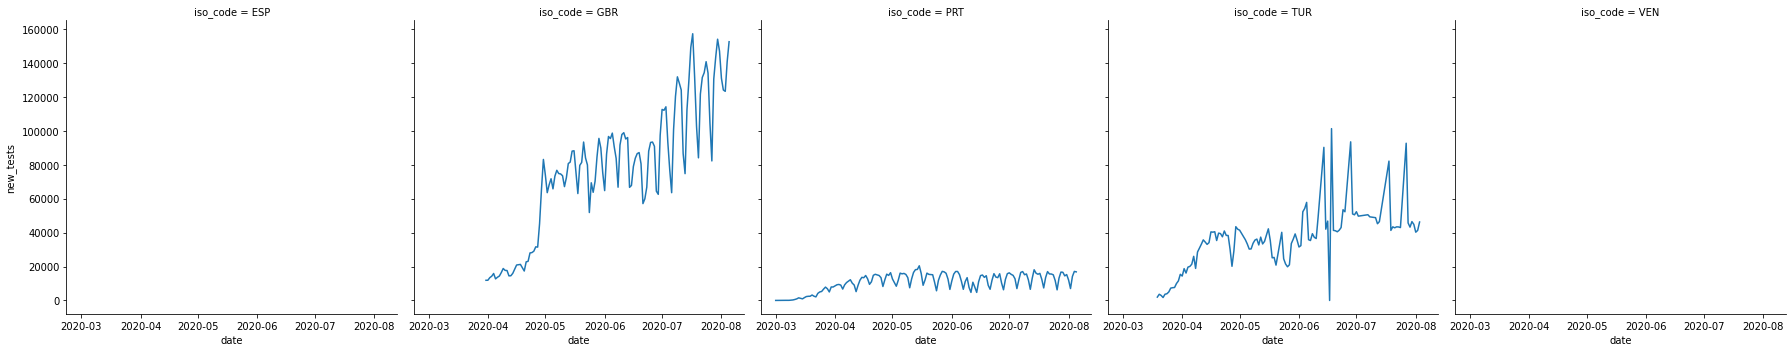

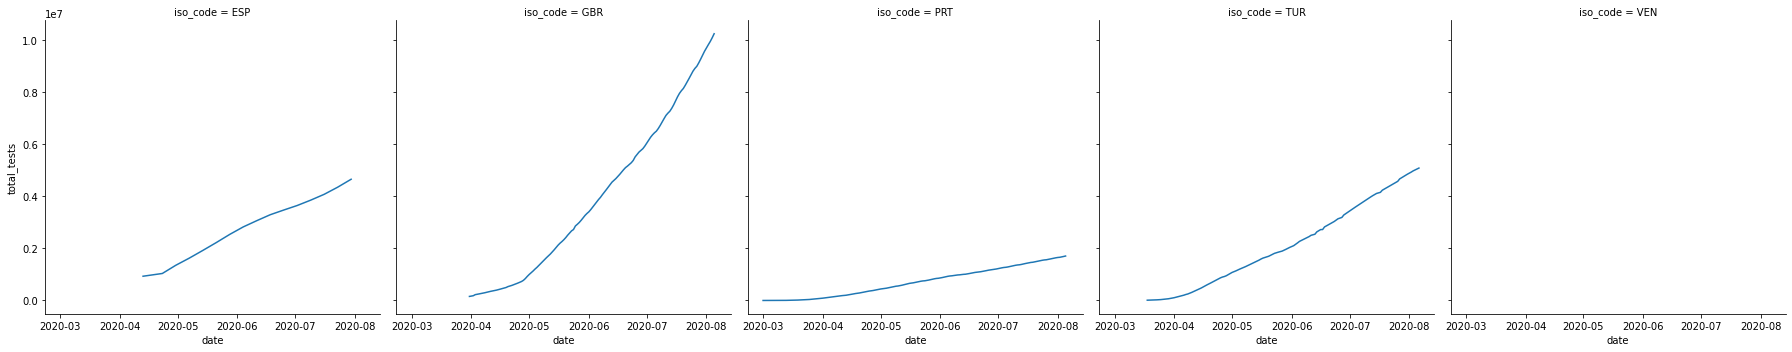

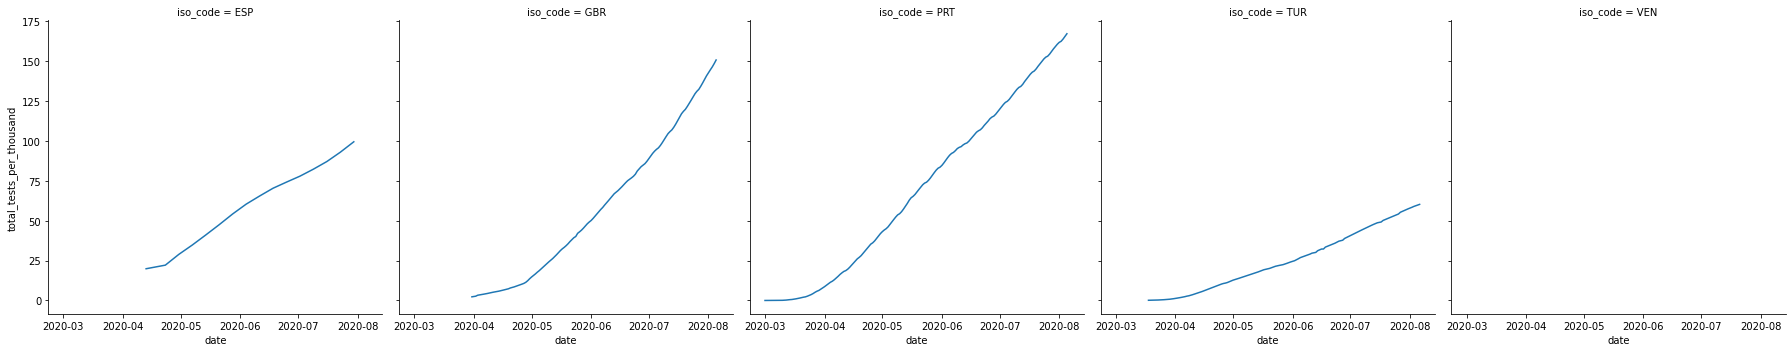

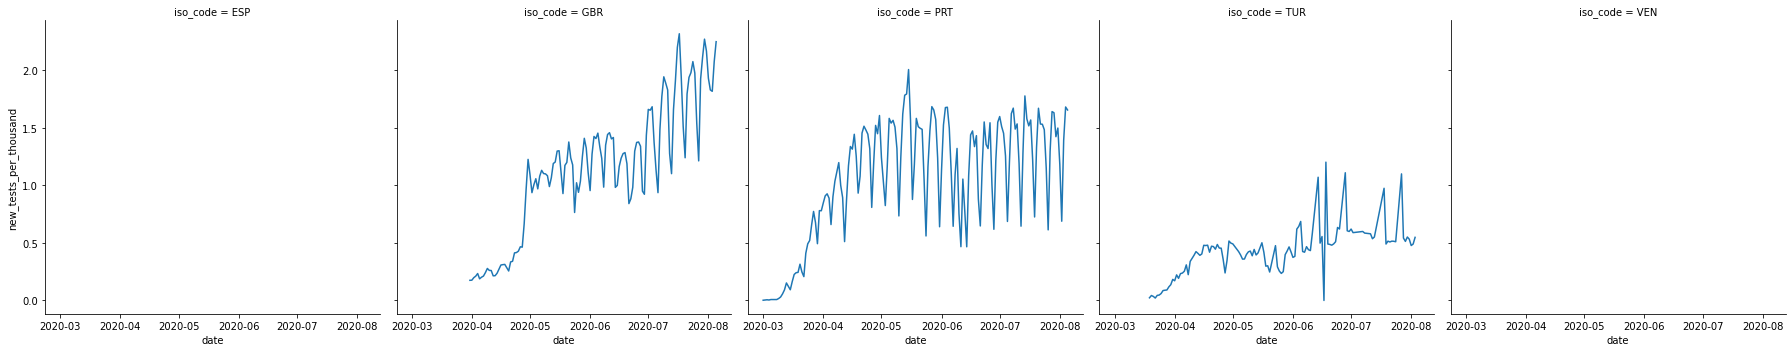

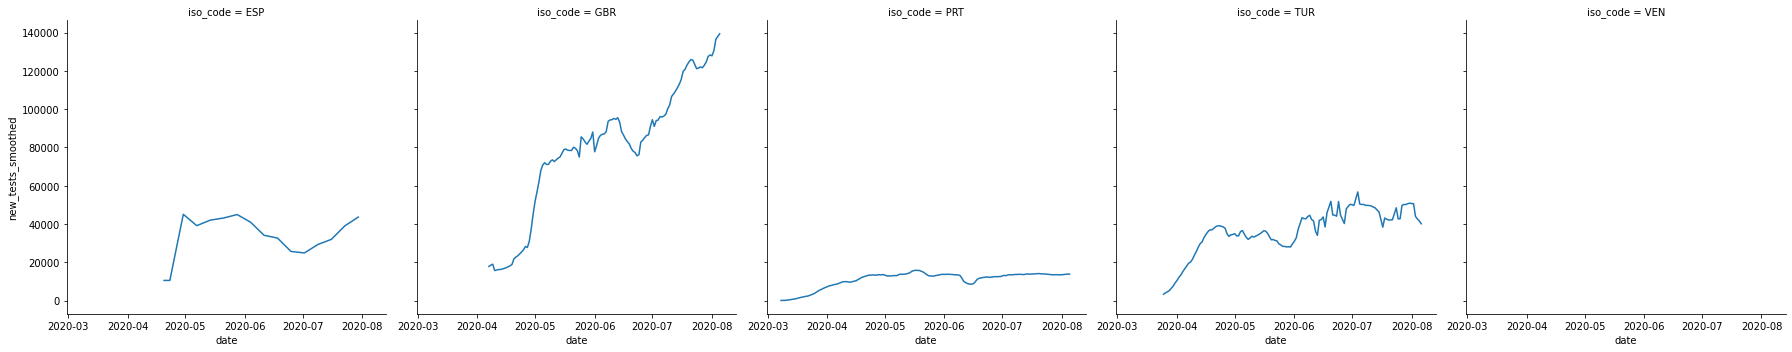

In [35]:
#Gráficos de cada variable separados por país
for elem in cols:
    sns.relplot(x="date", y=elem, col="iso_code", kind="line", data=covid_grupoD)

______________
## ANÁLISIS DETALLADO POR PAÍS
Show different tendencies for each column in your dataset. Show, vertically, thestart date and end date of the alarm state in each plot
______________

### MUERTES TOTALES Y CASOS TOTALES DE CADA PAÍS (CONTRASTADOS CON FECHAS DE ESTADO DE ALARMA)

In [36]:
def graf_pais (ccode,col_dat, cname,cdf, y_maximo):
    if y_maximo:
        eje_y = cdf.total_cases.max()
        tit = cname.upper() + " COVID19 - TOTALES"
        filen= "Tot_"
    else:
        eje_y = cdf.rank_TCxM.max()
        tit = cname.upper() + " COVID19 - RANKING"
        filen= "Rank_"
    fg = cdf.plot(x="date", y= col_dat, kind="line", figsize=(12,8),title= tit)
    fg.legend(bbox_to_anchor=(1.2, 0.5))
    plt.vlines(alarm_dates.alarm_init[alarm_dates.iso_code == ccode].to_frame().iloc[0,0], ymin=0, ymax=eje_y, color = "r", linestyles =":")
    plt.vlines(alarm_dates.alarm_end[alarm_dates.iso_code == ccode].to_frame().iloc[0,0], ymin=0, ymax=eje_y, color = "r", linestyles =":")
    plt.savefig("../resources/"+ filen + elem+".png",bbox_inches='tight')
    plt.show()

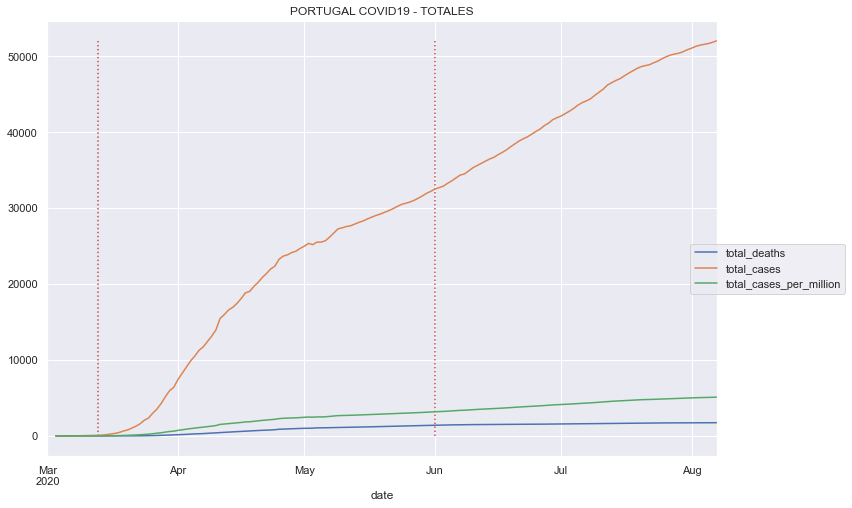

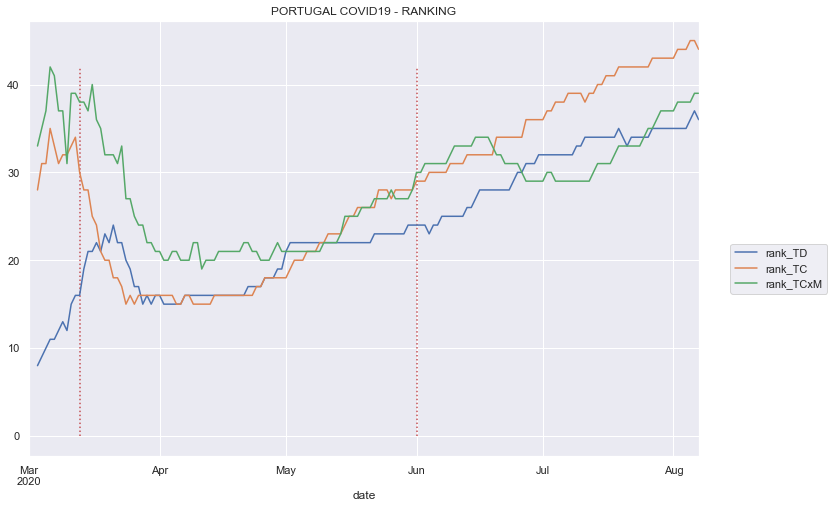

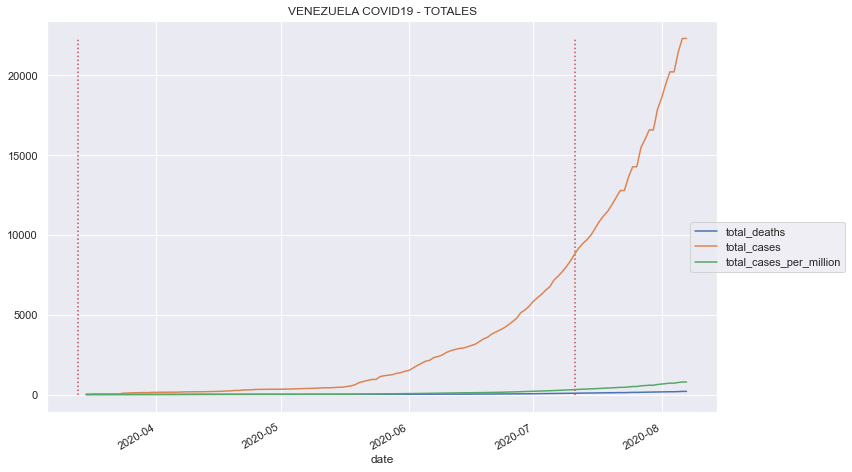

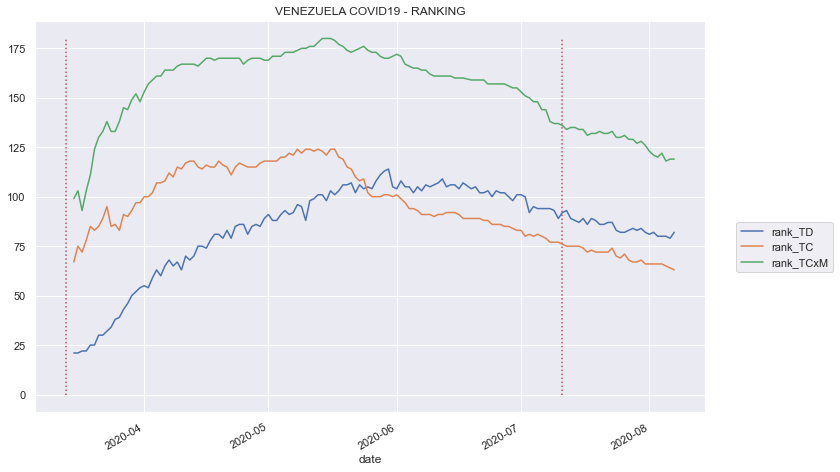

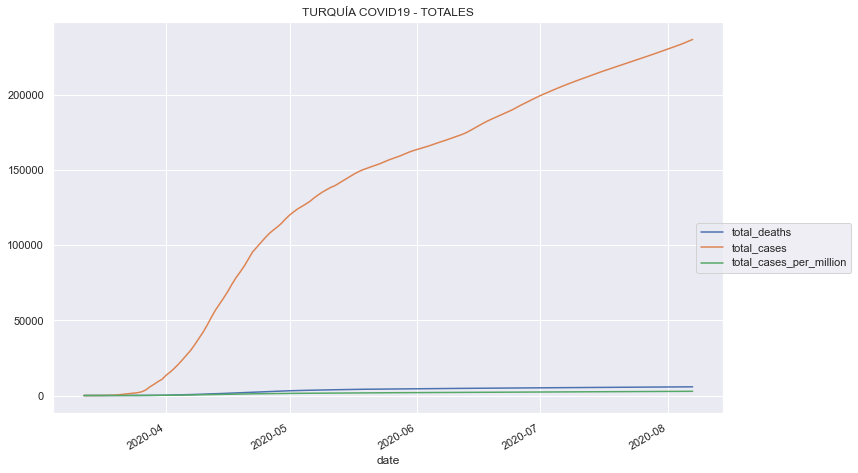

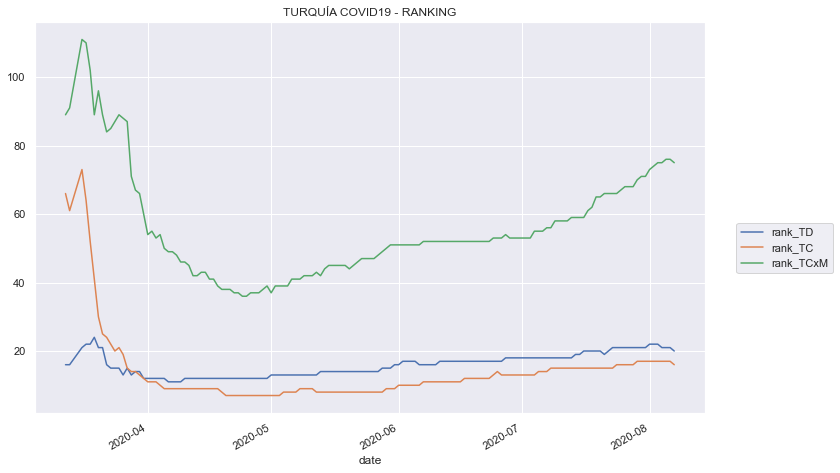

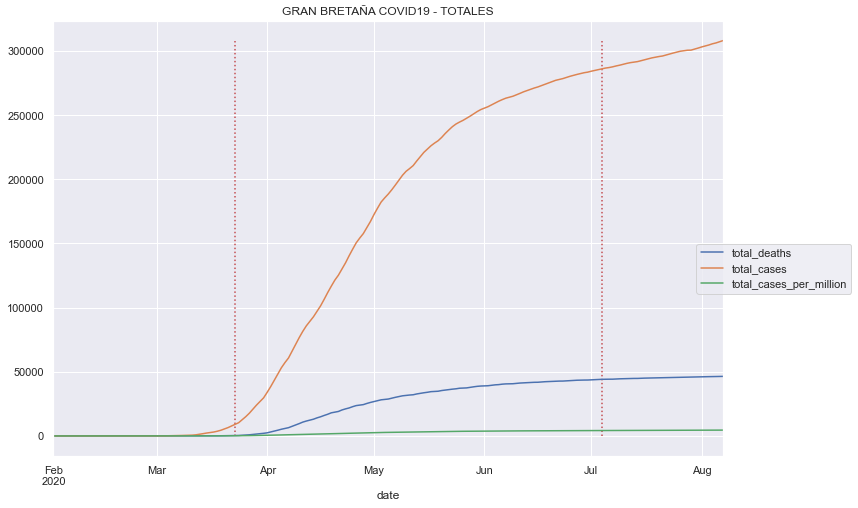

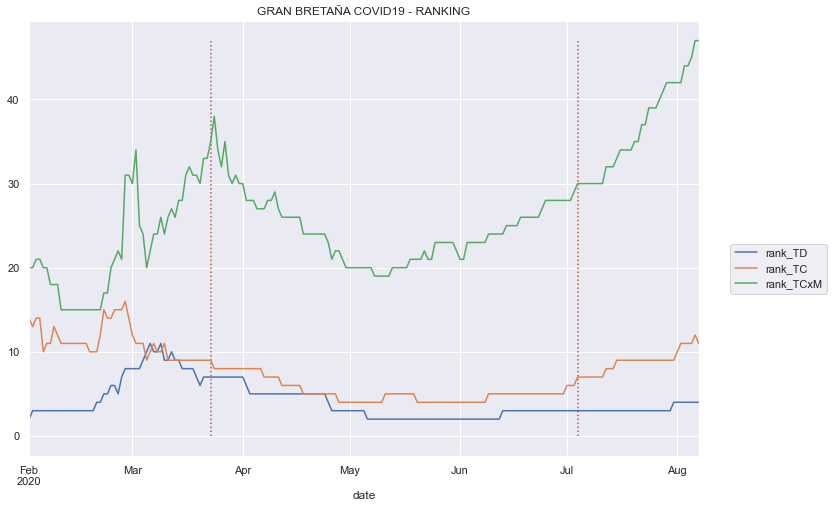

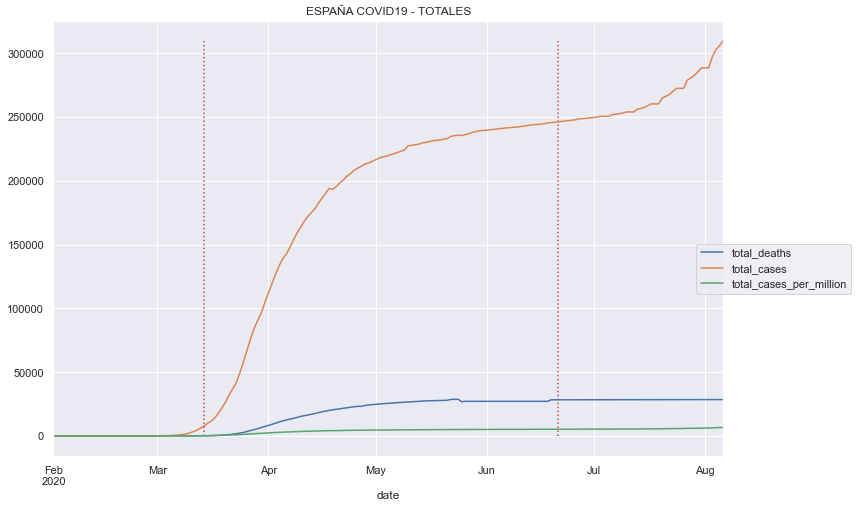

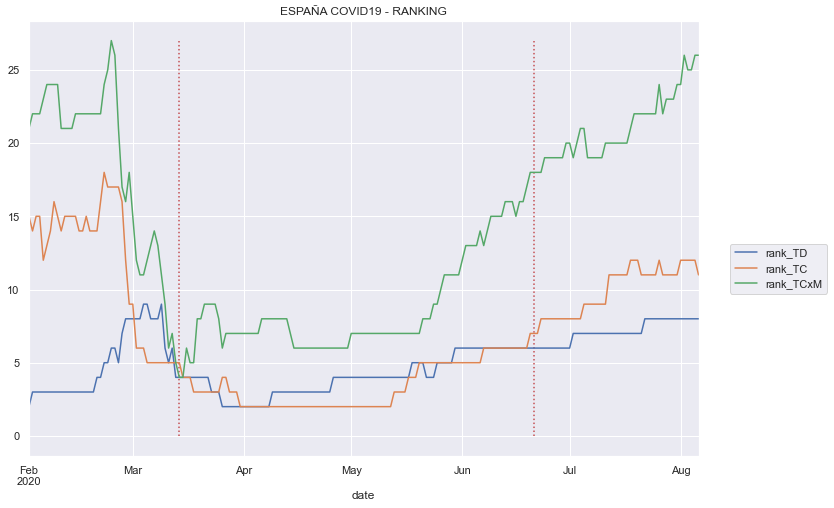

In [37]:
sns.set()
col_dat1 = ["total_deaths", "total_cases", "total_cases_per_million"]
col_dat2 = [ "rank_TD", "rank_TC", "rank_TCxM"]
for elem in paises_grupoD:
    df = covid_grupoD[covid_grupoD.iso_code==elem]
    graf_pais(elem, col_dat1, paises_nombres[elem], df, True)
    graf_pais(elem, col_dat2, paises_nombres[elem], df, False)
  


In [38]:
#Dataframe con información resumida de datos referenciales por país
datos_paises = covid_grupoD.iloc[:,[1,20,21,22,23,24,29,30,32,33]].drop_duplicates()

In [39]:
datos_paises.info()
# Nota: 
# Stringency Index: The Government Response Stringency Index is a composite measure based on nine response indicators including
# school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response).

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 825
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   iso_code               345 non-null    object 
 1   positive_rate          308 non-null    float64
 2   tests_units            315 non-null    object 
 3   stringency_index       331 non-null    float64
 4   population             345 non-null    float64
 5   population_density     345 non-null    float64
 6   extreme_poverty        336 non-null    float64
 7   cardiovasc_death_rate  345 non-null    float64
 8   female_smokers         336 non-null    float64
 9   male_smokers           336 non-null    float64
dtypes: float64(8), object(2)
memory usage: 29.6+ KB


In [40]:
datos_paises

iso_code  positive_rate tests_units  stringency_index  population  \
0        ESP            NaN         NaN             11.11  46754783.0   
37       ESP            NaN         NaN             25.00  46754783.0   
38       ESP            NaN         NaN             45.83  46754783.0   
42       ESP            NaN         NaN             67.13  46754783.0   
44       ESP            NaN         NaN             68.98  46754783.0   
..       ...            ...         ...               ...         ...   
743      VEN            NaN         NaN             85.19  28435943.0   
763      VEN            NaN         NaN             81.48  28435943.0   
782      VEN            NaN         NaN             87.04  28435943.0   
812      VEN            NaN         NaN             86.11  28435943.0   
825      VEN            NaN         NaN               NaN  28435943.0   

     population_density  extreme_poverty  cardiovasc_death_rate  \
0                93.105              1.0                 99.403   
37               93.105              1.0                 99.403   
38               93.105              1.0                 99.403   
42               93.105              1.0                 99.403   
44               93.105              1.0                 99.403   
..                  ...              ...                    ...   
743              36.253              NaN                204.850   
763              36.253              NaN                204.850   
782              36.253              NaN                204.850   
812              36.253              NaN                204.850   
825              36.253              NaN                204.850   

     female_smokers  male_smokers  
0              27.4          31.4  
37             27.4          31.4  
38             27.4          31.4  
42             27.4          31.4  
44             27.4          31.4  
..              ...           ...  
743             NaN           NaN  
763             NaN           NaN  
782             NaN           NaN  
812             NaN           NaN  
825             NaN           NaN  

[345 rows x 10 columns]

_________
## CORRELACIÓN
______________

In [41]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            829 non-null    int64         
 1   iso_code                         829 non-null    object        
 2   continent                        829 non-null    object        
 3   location                         829 non-null    object        
 4   date                             829 non-null    datetime64[ns]
 5   total_cases                      827 non-null    float64       
 6   new_cases                        827 non-null    float64       
 7   total_deaths                     827 non-null    float64       
 8   new_deaths                       827 non-null    float64       
 9   total_cases_per_million          827 non-null    float64       
 10  new_cases_per_million            827 non-null    float64      

In [42]:
#Matriz de correlación entre variables
grupoD_corr = covid_grupoD.iloc[:,np.r_[1,5,7,9,22:36]]     #Un subconjunto de las variables a contrastar

In [43]:
grupoD_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    829 non-null    object 
 1   total_cases                 827 non-null    float64
 2   total_deaths                827 non-null    float64
 3   total_cases_per_million     827 non-null    float64
 4   stringency_index            798 non-null    float64
 5   population                  829 non-null    float64
 6   population_density          829 non-null    float64
 7   median_age                  829 non-null    float64
 8   aged_65_older               829 non-null    float64
 9   aged_70_older               829 non-null    float64
 10  gdp_per_capita              829 non-null    float64
 11  extreme_poverty             684 non-null    float64
 12  cardiovasc_death_rate       829 non-null    float64
 13  diabetes_prevalence         829 non

In [44]:
grupoD_corr.shape

(829, 18)

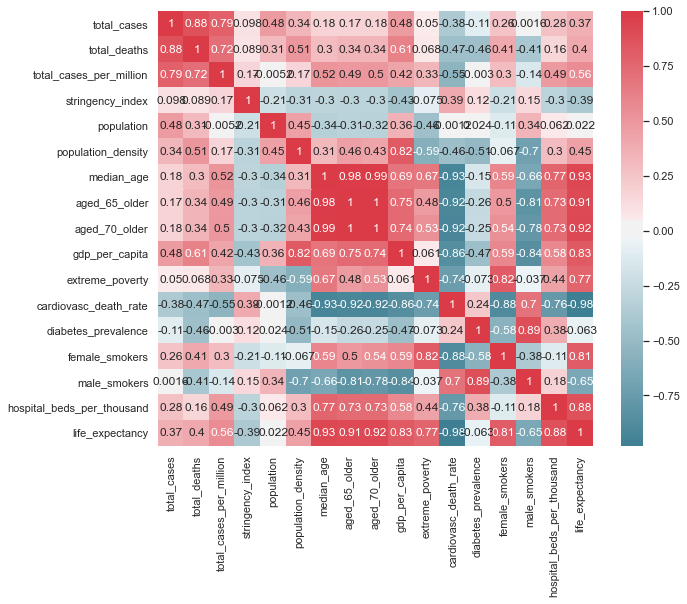

In [45]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = grupoD_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
      square=True, ax=ax, annot=True) 

## Matriz de correlación Todos los países.

In [46]:
#Seleccion del DF mundial del subconjunto de las variables a correlacionar
world_df_corr = world_df.iloc[:,np.r_[0,4,6,8,21:33,34:36]]    

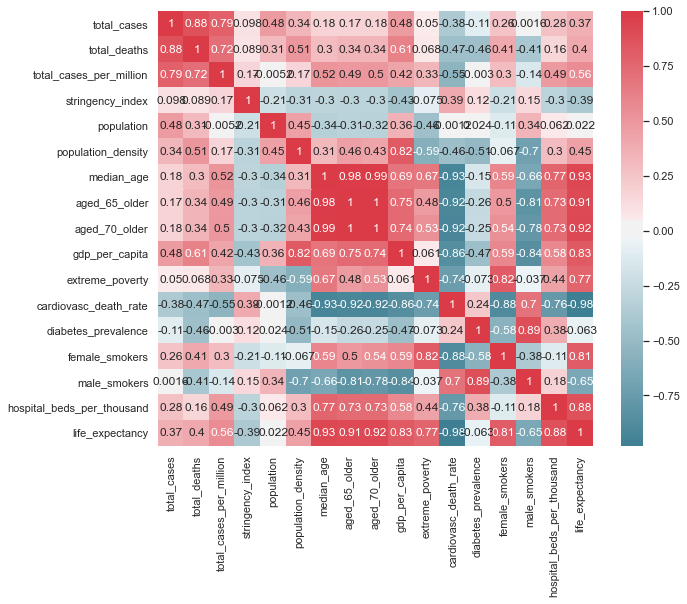

In [47]:
#Mapa de calor de la matriz de correlación 
f, ax = plt.subplots(figsize=(10, 8)) 
corr2 = world_df_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
      square=True, ax=ax, annot=True) 

### NOTA:Otras pruebas. No considerar este código

In [48]:
#Dejar únicamente las columnas que interesan para la evaluación del ranking
#world_df = world_df[["iso_code", "continent", "location", "date", "total_cases", "total_deaths", "total_cases_per_million", "stringency_index", "population", "population_density","hospital_beds_per_thousand", "life_expectancy" ]]

In [49]:
#Crea un DF por cada país (llamado covid_ESP, etc) a partir de los datos del dataframe covid_grupoD. 
#for elem in paises_grupoD:
#    df_name = "covid_" + elem
#    globals()[df_name] = covid_grupoD[covid_grupoD.iso_code==elem]

In [50]:
#for elem in cols_rank:
#    sns.relplot(x="date", y=elem, col="iso_code", kind="line", data=rank_grupoD)